In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

In [3]:
# Para mostrar todas las columnas del notebook
pd.pandas.set_option("display.max_columns",None)

In [5]:
#Load dataset
data = pd.read_csv('./Input/train.csv')

print(data.shape)

data.head()

(137, 43)


,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0


El siguiente dataset tiene 43 columnas y 137 datos 

In [8]:
data.drop('Id',axis=1, inplace=True)

data.shape

(137, 42)

<Axes: >

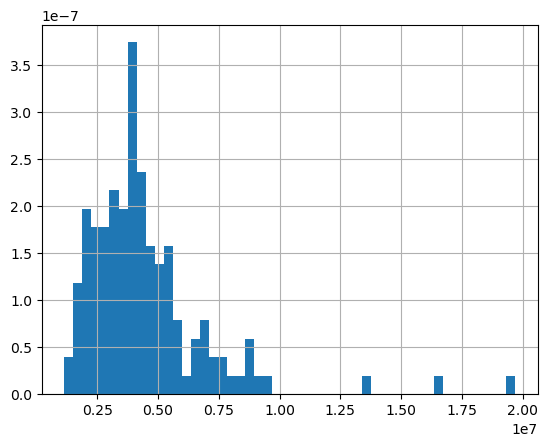

In [10]:
data['revenue'].hist(bins=50, density=True)
#plt.ylabel("")

Como podemos observar, los datos estan sesgados a la derecha :

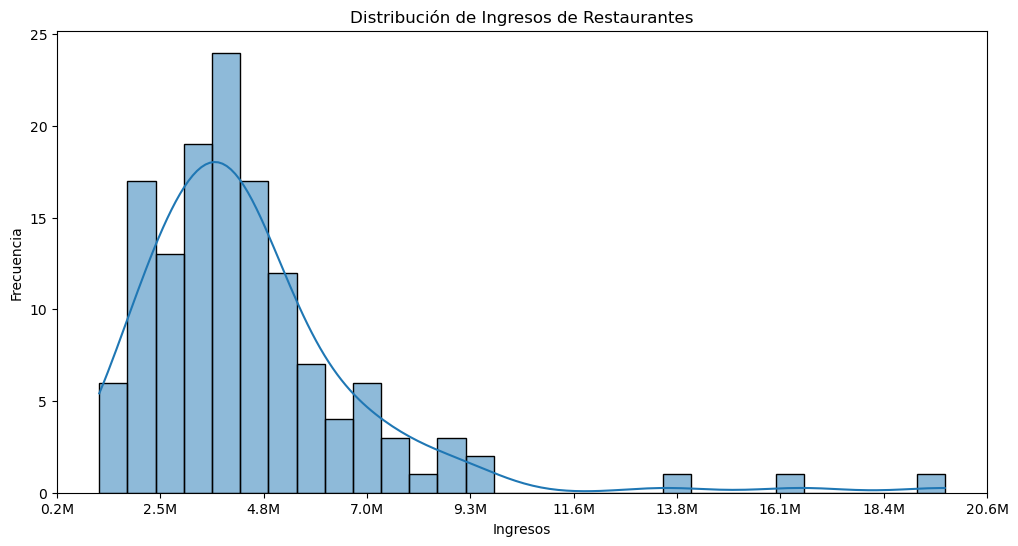

In [13]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='revenue', kde=True, bins=30)
plt.title('Distribución de Ingresos de Restaurantes')
plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')

# Obtener los límites actuales del eje x
x_min, x_max = plt.xlim()

# Crear nuevos ticks
ticks = np.linspace(x_min, x_max, 10)

# Establecer los nuevos ticks
plt.xticks(ticks)

# Ajustar las etiquetas de los ticks
plt.gca().set_xticklabels([f'{x/1e6:.1f}M' for x in ticks])

plt.show()

data

In [16]:
print(data.duplicated().sum())

0


In [18]:
data.isnull().sum().sort_values(ascending=False)

Open Date     0
P28           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P29           0
City          0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
P19           0
P18           0
P17           0
P16           0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
revenue       0
dtype: int64

In [20]:
data.isnull().sum().sort_values(ascending=False)/len(data)*100

Open Date     0.0
P28           0.0
P20           0.0
P21           0.0
P22           0.0
P23           0.0
P24           0.0
P25           0.0
P26           0.0
P27           0.0
P29           0.0
City          0.0
P30           0.0
P31           0.0
P32           0.0
P33           0.0
P34           0.0
P35           0.0
P36           0.0
P37           0.0
P19           0.0
P18           0.0
P17           0.0
P16           0.0
City Group    0.0
Type          0.0
P1            0.0
P2            0.0
P3            0.0
P4            0.0
P5            0.0
P6            0.0
P7            0.0
P8            0.0
P9            0.0
P10           0.0
P11           0.0
P12           0.0
P13           0.0
P14           0.0
P15           0.0
revenue       0.0
dtype: float64

Cuantas variables categoricas tenemos?

In [23]:
cat_vars = [var for var in data.columns if data[var].dtype == '0']

# cat_vars = cat_vars + ['MSSubClass']
# print(cat_vars)
len(cat_vars)

0

In [25]:
data[cat_vars] = data[cat_vars].astype('0')

In [27]:
data.dtypes

Open Date      object
City           object
City Group     object
Type           object
P1              int64
P2            float64
P3            float64
P4            float64
P5              int64
P6              int64
P7              int64
P8              int64
P9              int64
P10             int64
P11             int64
P12             int64
P13           float64
P14             int64
P15             int64
P16             int64
P17             int64
P18             int64
P19             int64
P20             int64
P21             int64
P22             int64
P23             int64
P24             int64
P25             int64
P26           float64
P27           float64
P28           float64
P29           float64
P30             int64
P31             int64
P32             int64
P33             int64
P34             int64
P35             int64
P36             int64
P37             int64
revenue       float64
dtype: object

In [29]:
int_columns = data.columns[(data.columns.str.startswith('P')) & (data.dtypes == 'int64')]
print(int_columns)

Index(['P1', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37'],
      dtype='object')


In [31]:
for col in int_columns:
    data[col] = data[col].astype('float64')

In [33]:
print("\nTipos de datos después de la conversión:")
print(data.dtypes)


Tipos de datos después de la conversión:
Open Date      object
City           object
City Group     object
Type           object
P1            float64
P2            float64
P3            float64
P4            float64
P5            float64
P6            float64
P7            float64
P8            float64
P9            float64
P10           float64
P11           float64
P12           float64
P13           float64
P14           float64
P15           float64
P16           float64
P17           float64
P18           float64
P19           float64
P20           float64
P21           float64
P22           float64
P23           float64
P24           float64
P25           float64
P26           float64
P27           float64
P28           float64
P29           float64
P30           float64
P31           float64
P32           float64
P33           float64
P34           float64
P35           float64
P36           float64
P37           float64
revenue       float64
dtype: object


In [35]:
data.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,07/17/1999,İstanbul,Big Cities,IL,4.0,5.0,4.0,4.0,2.0,2.0,5.0,4.0,5.0,5.0,3.0,5.0,5.0,1.0,2.0,2.0,2.0,4.0,5.0,4.0,1.0,3.0,3.0,1.0,1.0,1.0,4.0,2.0,3.0,5.0,3.0,4.0,5.0,5.0,4.0,3.0,4.0,5653753.0
1,02/14/2008,Ankara,Big Cities,FC,4.0,5.0,4.0,4.0,1.0,2.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6923131.0
2,03/09/2013,Diyarbakır,Other,IL,2.0,4.0,2.0,5.0,2.0,3.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2055379.0
3,02/02/2012,Tokat,Other,IL,6.0,4.5,6.0,6.0,4.0,4.0,10.0,8.0,10.0,10.0,8.0,10.0,7.5,6.0,4.0,9.0,3.0,12.0,20.0,12.0,6.0,1.0,10.0,2.0,2.0,2.5,2.5,2.5,7.5,25.0,12.0,10.0,6.0,18.0,12.0,12.0,6.0,2675511.0
4,05/09/2009,Gaziantep,Other,IL,3.0,4.0,3.0,4.0,2.0,2.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,2.0,1.0,2.0,1.0,4.0,2.0,2.0,1.0,2.0,1.0,2.0,3.0,3.0,5.0,1.0,3.0,5.0,1.0,3.0,2.0,3.0,4.0,3.0,3.0,4316715.0


<Axes: >

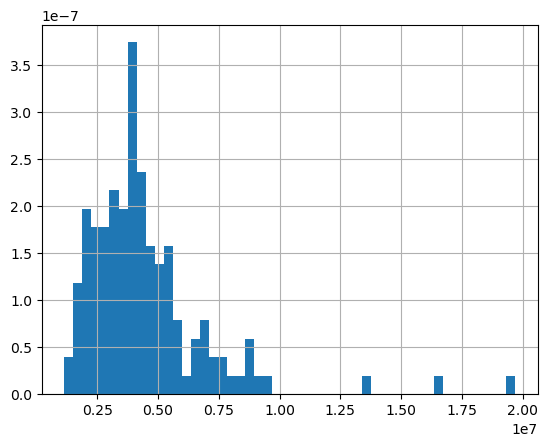

In [37]:
data['revenue'].hist(bins=50, density=True)